In [85]:
import zipfile

zip_file_paths = ['trainImages.zip', 'validationImages.zip']

for path in zip_file_paths:
    name = str(path)
    with zipfile.ZipFile(path, "r") as zip_ref:
        zip_ref.extractall(f'unzipped/{name.split(".")[0]}')


In [86]:
!pwd

/content


In [87]:
import pandas as pd

df_validation = pd.read_csv('unzipped/validationImages/labels/detections.csv')
df_validation.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,xclick,/m/0cmf2,1,0.0227,0.9642,0.0710,0.8005,0,0,0,0,0
1,000595fe6fee6369,xclick,/m/02wbm,1,0.0000,1.0000,0.0000,1.0000,0,0,1,0,0
2,000595fe6fee6369,xclick,/m/02xwb,1,0.1414,0.1797,0.6763,0.7317,0,0,0,0,0
3,000595fe6fee6369,xclick,/m/02xwb,1,0.2135,0.2533,0.2993,0.3548,1,0,0,0,0
4,000595fe6fee6369,xclick,/m/02xwb,1,0.2327,0.2887,0.4900,0.5455,1,0,0,0,0


In [88]:
import pandas as pd

df_train = pd.read_csv('unzipped/trainImages/labels/detections.csv')
df_train.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,000002b66c9c498e,xclick,/m/01g317,1,0.0125,0.1953,0.1484,0.5875,0,1,...,0,0,0.1484,0.0125,0.0594,0.1953,0.1484,0.3578,0.5875,0.3250
1,000002b66c9c498e,xclick,/m/01g317,1,0.0250,0.2766,0.7141,0.9484,0,1,...,0,0,0.0250,0.2484,0.2766,0.2141,0.9141,0.7141,0.7828,0.9484
2,000002b66c9c498e,xclick,/m/01g317,1,0.1516,0.3109,0.1984,0.5906,1,0,...,0,0,0.2437,0.1516,0.3109,0.2625,0.1984,0.4344,0.5078,0.5906
3,000002b66c9c498e,xclick,/m/01g317,1,0.2562,0.4297,0.6516,0.9250,1,0,...,0,0,0.3156,0.4297,0.2562,0.4234,0.6516,0.9219,0.8266,0.9250
4,000002b66c9c498e,xclick,/m/01g317,1,0.2578,0.3469,0.2359,0.3859,1,0,...,0,0,0.3172,0.2578,0.3469,0.3078,0.2359,0.2891,0.3484,0.3859


In [89]:
len(df_train)

14610229

In [90]:
len(df_validation)

303980

In [91]:
data_path_validation = "unzipped/validationImages/data/*.jpg"

In [92]:
data_path_train = "unzipped/trainImages/data/*.jpg"

In [93]:
import glob
counter = 0

img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

517


In [94]:
import glob
counter = 0

img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


In [95]:
# Get image ids:
import glob

train_list_ids = []
validation_list_ids = []

def get_ids(split, print_this, to_append_list):
    start = 0
    end = 0
    if split == data_path_train:
        start,end = 26,42
    elif split == data_path_validation:
        start,end = 31,47
    else:
        raise Exception("Invalid Parameter")
    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list

    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
    print(len(img_ids))
    print(print_this)

In [96]:
get_ids(data_path_train, "I finished the task", train_list_ids)

517
I finished the task


In [97]:
train_list_ids[0]

'0ddad0dfddfbe0d6'

In [98]:
get_ids(data_path_validation, "I finished the task", validation_list_ids)

9
I finished the task


In [99]:
validation_list_ids[0]

'7e25a4a33611d933'

In [100]:
train_classes_df = pd.read_csv("unzipped/trainImages/metadata/classes.csv", names = ['className', 'Object'])
validation_classes_df = pd.read_csv("unzipped/validationImages/metadata/classes.csv", names = ['className', 'Object'])


In [101]:
train_identifier = train_classes_df[train_classes_df['Object'] == 'Plastic bag']
validation_identifier = validation_classes_df[validation_classes_df['Object'] == 'Plastic bag']

print(train_identifier)
print("___________________________")
print(validation_identifier)

     className       Object
327  /m/05gqfk  Plastic bag
___________________________
     className       Object
327  /m/05gqfk  Plastic bag


In [102]:
import random

def random_row_from_df(split):
    dataframe = ""

    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids#517
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids#9
    else:
        raise Exception("Inavlid parameter, must be either train or validation")

    img_ids_len = len(ids_to_check)
    rand = random.randint(0, img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == '/m/05gqfk')]
    print(r)

In [103]:
random_row_from_df("train")

2dcc05107c6df60d
                  ImageID  Source  LabelName  Confidence  XMin    XMax  YMin  \
2825529  2dcc05107c6df60d  xclick  /m/05gqfk           1   0.0  0.9918   0.0   

           YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
2825529  0.9984           0            1  ...            0         0   

         XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
2825529     0.165    0.9918    0.7288       0.0       0.0       0.0    0.9984   

         XClick4Y  
2825529    0.4477  

[1 rows x 21 columns]


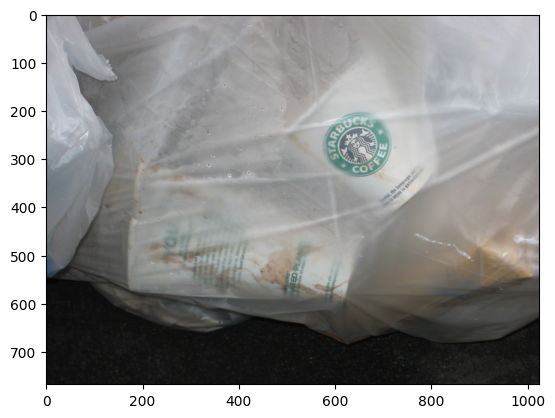

In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
from PIL import Image
import glob

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"


def visualize_random_image(split):
    split_path = train_images_path if split == 'train' else validation_images_path if split == 'validation' else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images - 1)
    random_image = images_paths[random_int]
    img = mping.imread(random_image)

    # Create the figure and the axes
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

visualize_random_image("train")




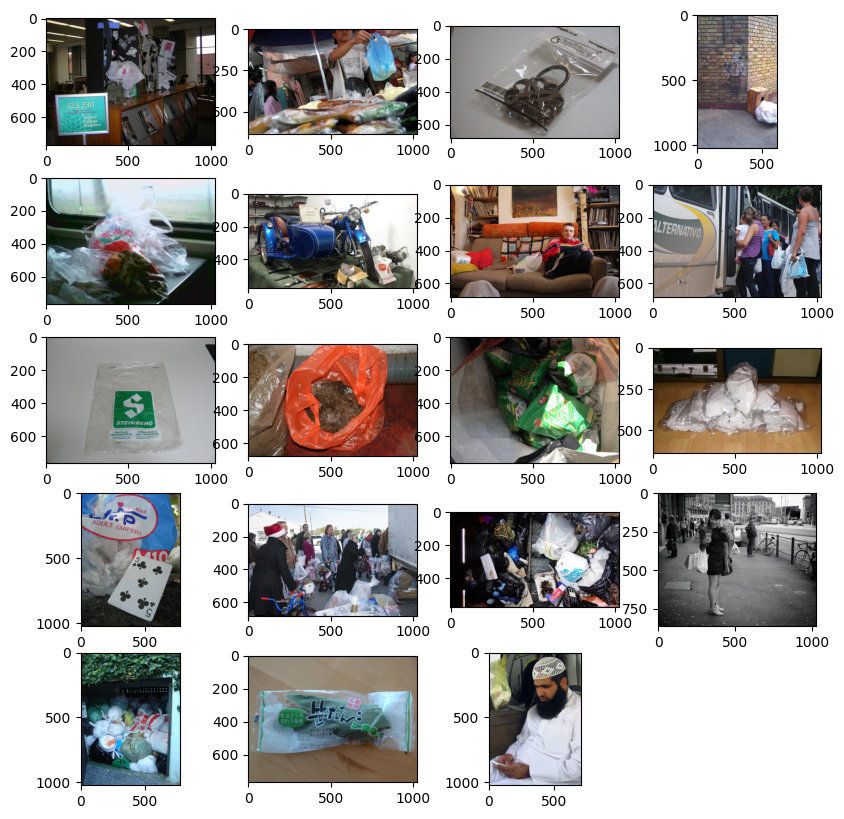

In [105]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
columns = 4
rows = 5

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"


def visualize_many(from_num, to_num, dataset):
    dataset_path = train_images_path if dataset == "train" else validation_images_path if dataset == "validation" else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter, must be either train or validation")
    images_paths = glob.glob(dataset_path)

    index_counter = 1
    for i in range(from_num, to_num):
        counter = i
        image = images_paths[counter]
        img = mping.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        index_counter +=1
    plt.show()

visualize_many(30, 49, "train")

In [106]:
df_validation.loc[(df_validation['ImageID'] == '4e24222b68123ef3') & (df_validation.LabelName == '/m/05gqfk')]

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
92793,4e24222b68123ef3,xclick,/m/05gqfk,1,0.3771,0.7458,0.7781,0.9688,0,0,0,0,0


768 1024


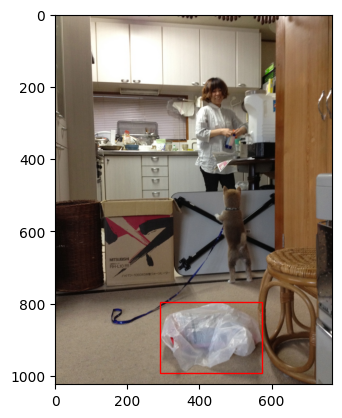

In [107]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open('unzipped/validationImages/data/4e24222b68123ef3.jpg')

fig, ax = plt.subplots()

ax.imshow(im)

image_width, image_height = im.size
print(image_width, image_height) # 786 1024

#xmin = 0.377083
#xmax = 0.745833
#ymin = 0.778125
#ymax = 0.96875

# new coordinates

xmin = 0.377083 * image_width
xmax = 0.745833 * image_width
ymin = 0.778125 * image_height
ymax = 0.96875  * image_height

# xmin = 289.599
# xmax = 572.7997
# ymin = 796.8
# ymax = 992.0

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin,ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

ax.add_patch(rect)
plt.show()

unzipped/trainImages/data/2ea40f1eb4b47510.jpg
0.340625 0.84125 0.418424 0.841287


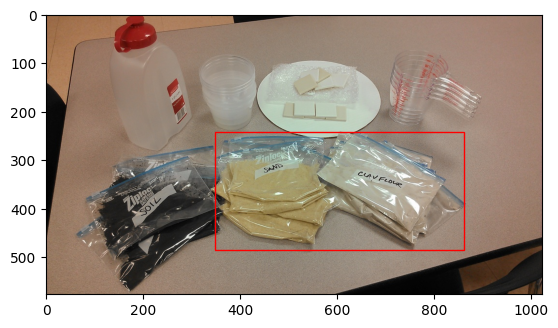

In [108]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import matplotlib.patches as patches
import random
import glob
from PIL import Image

validation_images_path = "unzipped/validationImages/data/*.jpg"
train_images_path = "unzipped/trainImages/data/*.jpg"

def visualize_bb(dataset):
    images_path = train_images_path if dataset == "train" else validation_images_path if dataset == "validation" else 0
    if dataset == 0:
        raise Exception("Invalid input parameter, must be either train or validation")

    start = 0
    end = 0

    if dataset == 'train':
        start, end, df, split = 26, 42, df_train, "trainImages"
    elif dataset == 'validation':
        start, end, df, split = 31, 47, df_validation, "validationImages"
    else:
        raise Exception("Invalid parameter")

    image_folder = images_path
    images_paths = glob.glob(image_folder)

    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images-1)
    random_image = images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    id_of_image = random_image[start:end]

    df_rows = df.loc[(df.ImageID == id_of_image) & (df.LabelName == '/m/05gqfk')]

    image_width, image_height = img.size

    fig, ax = plt.subplots()
    ax.imshow(img)

    for index, row in df_rows.iterrows():
        print(row['XMin'], row['XMax'], row['YMin'], row['YMax'])

        xmin = row['XMin']
        xmax = row['XMax']
        ymin = row['YMin']
        ymax = row['YMax']

        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        #print(new_xmin, new_xmax, new_ymin, new_ymax)

        width = new_xmax - new_xmin
        height = new_ymax - new_ymin

        rect = patches.Rectangle((new_xmin,new_ymin), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')
        ax.add_patch(rect)
    plt.show()

#visualize_bb("validation")
visualize_bb("train")
